In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import itertools

In [3]:
from cdlib import algorithms, ensemble, evaluation, viz, NodeClustering, TemporalClustering

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'infomap', 'wurlitzer', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [5]:
df= pd.read_csv("df_top10.csv") #df originale

### Preparazione del dataset

In [6]:
# Creazione di una nuova colonna 'Year' basata sulla colonna 'Date'
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')

df['Year'] = df['Publication Date'].dt.year

#df

In [7]:
# Filtro il dataset per intervalli: per i timestamp
G_2020 = df[(df['Year'] >= 2010.0) & (df['Year'] <= 2023.0)]

G_2010 = df[(df['Year'] >= 2000.0) & (df['Year'] <= 2009.0)]
G_2000 = df[(df['Year'] >= 1990.0) & (df['Year'] <= 1999.0)]
G_1990 = df[(df['Year'] >= 1980.0) & (df['Year'] <= 1989.0)]
G_1980 = df[(df['Year'] >= 1970.0) & (df['Year'] <= 1979.0)]


In [ ]:
graph_serie=[G_2020,G_2010,G_2000,G_1990,G_1980]

In [ ]:
# Funzione per generare combinazione di coppie di inventori
def generate_inventor_pairs_1(inventor_list):
    pairs = list(itertools.combinations(inventor_list, 2))
    return pairs

G_2020 è uguale al df compreso tra 2010 e il 2023

In [11]:
# Inizializzazione del dizionario per il conteggio delle coppie di inventori
pair_counts = {}

# Iterazione attraverso ogni riga del dataframe
for index, row in G_2020.iterrows():
    inventors = row['Inventors']
    
    if pd.isna(inventors) or not isinstance(inventors, str):
        continue
    
    inventors = inventors.split(';;')
    pairs = generate_inventor_pairs_1(inventors)
    
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1
    

# Creazione del nuovo dataframe con le colonne "source", "target" e "weight"
new_rows = []

for pair, count in pair_counts.items():
    source, target = pair
    new_rows.append({'Source': source, 'Target': target, 'Weight': count})

G1 = pd.DataFrame(new_rows)

In [12]:
#G1

G_2010 è uguale al df compreso tra 2000 e il 2009

In [13]:
# Inizializzazione del dizionario per il conteggio delle coppie di inventori
pair_counts = {}

# Iterazione attraverso ogni riga del dataframe
for index, row in G_2010.iterrows():
    inventors = row['Inventors']
    
    if pd.isna(inventors) or not isinstance(inventors, str):
        continue
    
    inventors = inventors.split(';;')
    pairs = generate_inventor_pairs_1(inventors)
    
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1
    

# Creazione del nuovo dataframe con le colonne "source", "target" e "weight"
new_rows = []

for pair, count in pair_counts.items():
    source, target = pair
    new_rows.append({'Source': source, 'Target': target, 'Weight': count})

G2 = pd.DataFrame(new_rows)

In [14]:
#G2

G_2000 è uguale al df compreso tra 1990 e il 1999

In [15]:
pair_counts = {}

for index, row in G_2000.iterrows():
    inventors = row['Inventors']
    
    if pd.isna(inventors) or not isinstance(inventors, str):
        continue
    
    inventors = inventors.split(';;')
    pairs = generate_inventor_pairs_1(inventors)
    
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1
    

new_rows = []

for pair, count in pair_counts.items():
    source, target = pair
    new_rows.append({'Source': source, 'Target': target, 'Weight': count})

G3 = pd.DataFrame(new_rows)

In [16]:
#G3

G_1990 è uguale al df compreso tra 1980 e il 1989

In [17]:
pair_counts = {}

for index, row in G_1990.iterrows():
    inventors = row['Inventors']
    
    if pd.isna(inventors) or not isinstance(inventors, str):
        continue
    
    inventors = inventors.split(';;')
    pairs = generate_inventor_pairs_1(inventors)
    
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1
    

new_rows = []

for pair, count in pair_counts.items():
    source, target = pair
    new_rows.append({'Source': source, 'Target': target, 'Weight': count})

G4 = pd.DataFrame(new_rows)

In [18]:
#G4

G_1980 è uguale al df compreso tra 1970 e il 1979

In [19]:
pair_counts = {}

for index, row in G_1980.iterrows():
    inventors = row['Inventors']
    
    if pd.isna(inventors) or not isinstance(inventors, str):
        continue
    
    inventors = inventors.split(';;')
    pairs = generate_inventor_pairs_1(inventors)
    
    for pair in pairs:
        if pair in pair_counts:
            pair_counts[pair] += 1
        else:
            pair_counts[pair] = 1
    

new_rows = []

for pair, count in pair_counts.items():
    source, target = pair
    new_rows.append({'Source': source, 'Target': target, 'Weight': count})

G5 = pd.DataFrame(new_rows)

In [20]:
#G5

In [21]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename, encoding='utf-8') as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_edge(l[0], l[1], weight=(l[2].rstrip('\n')))
    return g

### Louvain algorithm

In [28]:
X_TOT = [G5, pd.concat([G5,G4]), 
               pd.concat([G5,G4, G3]), pd.concat([G5,G4, G3, G2]),pd.concat([G5,G4, G3, G2,G1])]

In [29]:
#Numero di comunità create per ogni timestamp

tc = TemporalClustering()
t = 1
g = nx.Graph()

for df in X_TOT:
    g = nx.from_pandas_edgelist(df, target = "Target" ,source = "Source" )
    coms = algorithms.louvain(g)
    tc.add_clustering(coms, t)
    print(len(tc.get_clustering_at(t).communities))   
    t = t+1

63
102
146
135
115


In [28]:
trend = tc.clustering_stability_trend(evaluation.nf1)
#trend

[0.054978783592644985,
 0.04771337495647823,
 0.3224522635146269,
 0.49731044756293125]

### Distribuzione delle dimensioni dei temporal clustering

In [29]:
def to_dictionary_to_plot(dict_com):
    df = pd.DataFrame.from_dict(dict_com, orient='index')
    df = df.transpose()
    df['len_community'] = [len(x) for x in df.iloc[:,0]]
    return df


In [71]:
def plot_dimensions(df, i):
    plt.figure(figsize=(11,7))
    df.len_community.head(20).plot(kind = 'bar', color = "darkslateblue")
    plt.xticks(rotation=0, ha='right')
    plt.title(f"Dimensione delle comunità ({i} timestamp)")

In [31]:
dict_com_1 = {}
dict_com_2 = {}
dict_com_3 = {}
dict_com_4 = {}
dict_com_5 = {}

lista_dict = [dict_com_1, dict_com_2, dict_com_3, dict_com_4,dict_com_5]

for i in tc.get_observation_ids():
    community = {}
    diz_comm = tc.get_clustering_at(i).named_communities
    for el in diz_comm:
        community[el] =  diz_comm[el]
    dizionario = lista_dict[i-1]    
    dizionario[i] = community

In [72]:
df_plot_1 = to_dictionary_to_plot(dict_com_1)
df_plot_2 = to_dictionary_to_plot(dict_com_2)
df_plot_3 = to_dictionary_to_plot(dict_com_3)
df_plot_4 = to_dictionary_to_plot(dict_com_4)
df_plot_5 = to_dictionary_to_plot(dict_com_5)

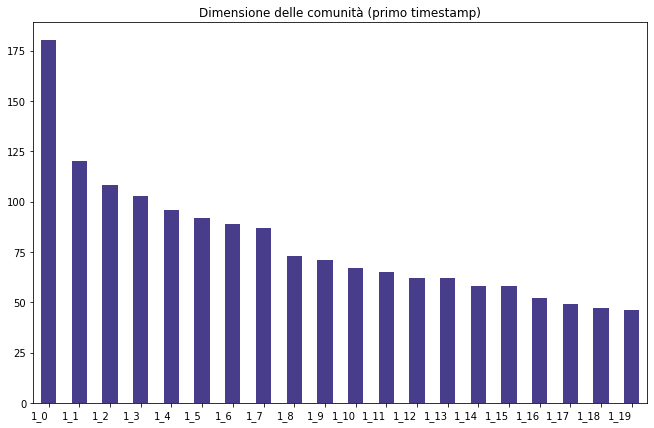

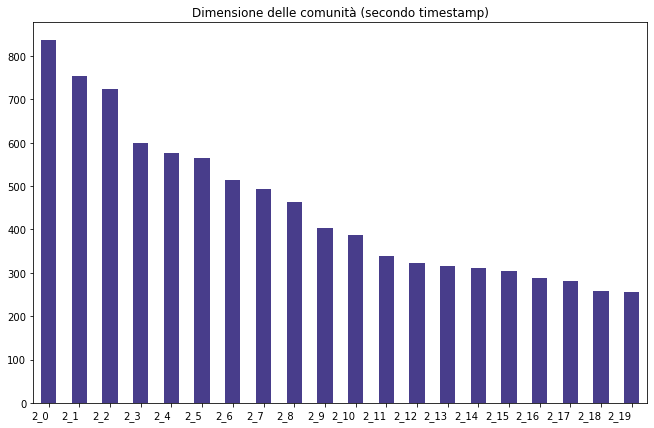

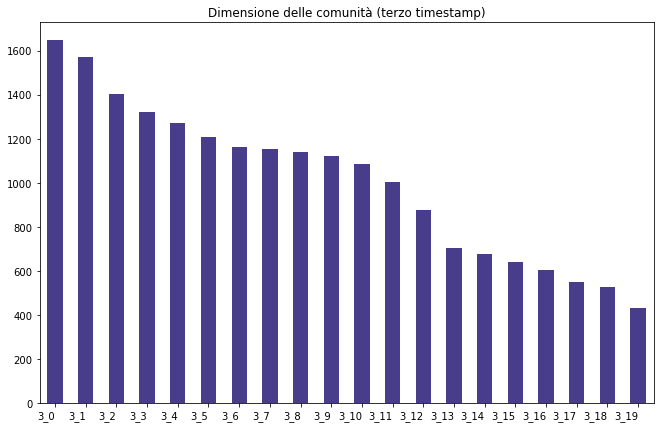

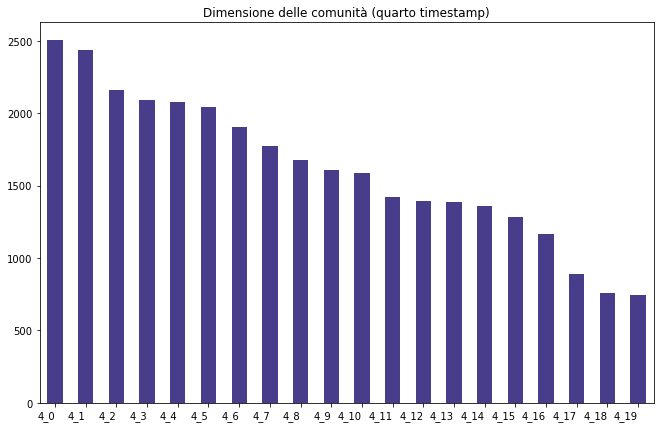

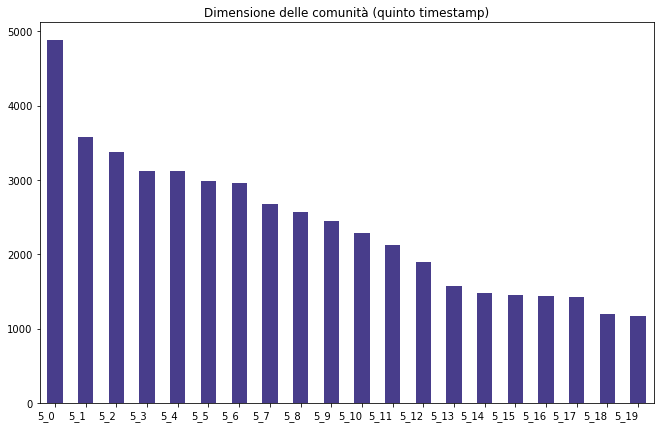

In [73]:
plot_dimensions(df_plot_1, "primo")
plot_dimensions(df_plot_2, "secondo")
plot_dimensions(df_plot_3, "terzo")
plot_dimensions(df_plot_4, "quarto")
plot_dimensions(df_plot_5, "quinto")

### Polytree

In [30]:
jaccard = lambda x, y: len(set(x) & set(y)) / len(set(x) | set(y))
com_polytree = tc.lifecycle_polytree(jaccard, two_sided=False)
print(com_polytree)

DiGraph with 551 nodes and 446 edges


In [31]:
weak_comp = list(nx.weakly_connected_components(com_polytree))[0]
x = com_polytree.copy()
x.remove_nodes_from([n for n in com_polytree.nodes() if n not in weak_comp])
    

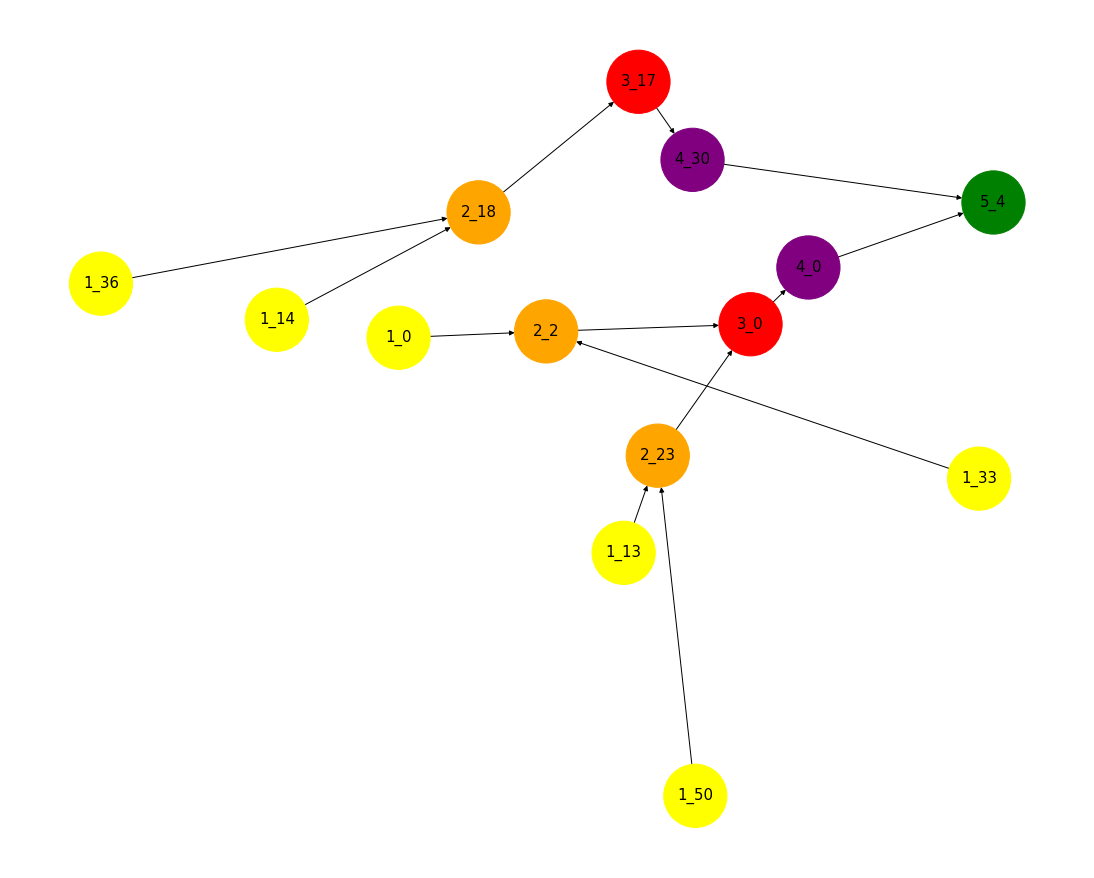

In [59]:
plt.figure(8,figsize=(15,12)) 

node_colors = []
label_dict = {}
for community in x.nodes():
        label_dict[community] = str(community) + "\n" + str(len(tc.get_community(str(community))))
        if str(community) == "2_18" or str(community) == "2_23" or str(community) == "2_2":
            node_colors.append('orange')
        elif str(community) == "3_0" or str(community) == "3_17":
            node_colors.append('red')
        elif str(community) == "4_0" or str(community) == "4_30":
            node_colors.append('purple')
        elif str(community) == "5_4":
            node_colors.append('green')
        else:
            node_colors.append('yellow')
nx.draw(x, pos=nx.spring_layout(x), with_labels=True, node_color = node_colors, font_size = 15, node_size = 4000) 


### Analisi polytree

In [60]:
tc.get_explicit_community_match()

In [61]:
matches = tc.community_matching(jaccard, two_sided=True)

In [67]:
#matches

In [79]:
result = [(i, t) for i, t in enumerate(matches) if t[1] == '5_4' and t[2] != 0]
for i, t in result:
    print(f'Riga {i}: {t}')

Riga 311: ('4_0', '5_4', 0.6022967663946812)
Riga 341: ('4_30', '5_4', 0.06866952789699571)
Riga 450: ('4_0', '5_4', 0.6022967663946812)


In [84]:
len(tc.get_clustering_at(5).named_communities[matches[311][1]]) #size ultimo nodo

3094

In [90]:
comunità_originarie = ["1_0", "1_14", "1_36", "1_13", "1_50", "1_33"]
result = []

for c in comunità_originarie:
    for i, t in enumerate(matches):
        if t[0] == c and t[2] != 0:
            result.append((i, t))

for i, t in result:
    print(f'Riga {i}: {t}')


Riga 0: ('1_0', '2_2', 0.23695345557122707)
Riga 13604: ('1_0', '2_2', 0.23695345557122707)
Riga 14: ('1_14', '2_18', 0.14559386973180077)
Riga 13619: ('1_14', '2_17', 0.012618296529968454)
Riga 13620: ('1_14', '2_18', 0.14559386973180077)
Riga 36: ('1_36', '2_18', 0.04979253112033195)
Riga 13: ('1_13', '2_23', 0.23214285714285715)
Riga 13625: ('1_13', '2_23', 0.23214285714285715)
Riga 50: ('1_50', '2_23', 0.013953488372093023)
Riga 33: ('1_33', '2_2', 0.017241379310344827)


In [94]:
print(len(tc.get_clustering_at(1).named_communities[matches[0][0]]), #size dei nodi di partenza
len(tc.get_clustering_at(1).named_communities[matches[14][0]]),
len(tc.get_clustering_at(1).named_communities[matches[36][0]]),
len(tc.get_clustering_at(1).named_communities[matches[13][0]]),
len(tc.get_clustering_at(1).named_communities[matches[50][0]]),
len(tc.get_clustering_at(1).named_communities[matches[33][0]]))

182 58 12 62 4 13


## 
In questa sezione si testano i temporal clustering degli altri algoritmi e si verificano le performance 

In [57]:
tc = TemporalClustering()
condu_tot=[]
mod_tot=[]
internal_degree_tot=[]

for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    coms = algorithms.louvain(g)
    condu=coms.conductance()
    mod=coms.newman_girvan_modularity()
    internal_degree=coms.average_internal_degree()
    condu_tot.append(condu)
    mod_tot.append(mod)
    internal_degree_tot.append(internal_degree)



In [58]:
internal_degree_tot

[FitnessResult(min=1.0, max=12.027397260273972, score=4.4259101793366655, std=2.306262986182572),
 FitnessResult(min=1.0, max=11.95, score=4.935351300109541, std=2.8226385134338985),
 FitnessResult(min=1.0, max=14.656716417910447, score=5.249313572427627, std=3.160556772051128),
 FitnessResult(min=1.0, max=15.292661361626879, score=5.722084451152607, std=3.4310820144670053),
 FitnessResult(min=1.0, max=41.37931034482759, score=6.528599814507335, std=4.945589151683925)]

In [40]:
annata=[1980,1990,2000,2010,2020]

condu_tot,mod_tot

([FitnessResult(min=0.0, max=0.09717868338557993, score=0.011836976543868526, std=0.017917139344555532),
  FitnessResult(min=0.0, max=0.2140077821011673, score=0.03223258360851941, std=0.0500571984263231),
  FitnessResult(min=0.0, max=0.28888888888888886, score=0.029063269932709523, std=0.059925801495478305),
  FitnessResult(min=0.0, max=0.20225789898101312, score=0.030537351738730054, std=0.055685647236532014),
  FitnessResult(min=0.0, max=0.2234609791565681, score=0.030294863300193334, std=0.05343994672863941)],
 [FitnessResult(min=None, max=None, score=0.928226332060958, std=None),
  FitnessResult(min=None, max=None, score=0.8675473338654197, std=None),
  FitnessResult(min=None, max=None, score=0.8350929064566018, std=None),
  FitnessResult(min=None, max=None, score=0.8494124069725633, std=None),
  FitnessResult(min=None, max=None, score=0.8654868197462935, std=None)])

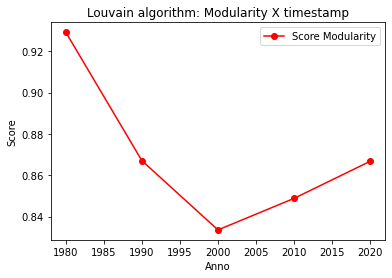

In [70]:
#estrazione dello score da ogni risultato
scores_condu = [result.score for result in condu_tot]
scores_mod = [result.score for result in mod_tot]
x = annata

#lineplot per rappresentare la modularity
plt.plot(x, scores_mod, marker='o', linestyle='-', color='r', label='Score Modularity')

plt.xlabel('Anno')
plt.ylabel('Score')
plt.legend()
plt.title('Louvain algorithm: Modularity X timestamp')
plt.show()


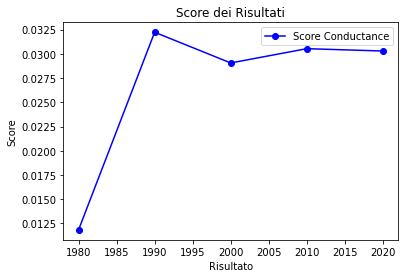

In [42]:
# Estrazione dello score da ogni risultato
scores_condu = [result.score for result in condu_tot]

x = annata

plt.plot(x, scores_condu, marker='o', linestyle='-', color='b', label='Score Conductance')

plt.xlabel('Risultato')
plt.ylabel('Score')

plt.title('Score dei Risultati')
plt.legend()
plt.show()


In [79]:
#test con leiden
tc_2 = TemporalClustering()
t=1
for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    coms = algorithms.leiden(g)
    tc_2.add_clustering(coms, t)
    print(len(tc_2.get_clustering_at(t).communities))   
    t = t+1

62
101
146
136
119


In [47]:
condu_2_tot=[]
mod_2_tot=[]


for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    coms = algorithms.leiden(g)
    condu=coms.conductance()
    mod=coms.newman_girvan_modularity()
    condu_2_tot.append(condu)
    mod_2_tot.append(mod)

In [56]:
trend_2 = tc_2.clustering_stability_trend(evaluation.nf1)
trend_2

[0.048476455552973745,
 0.05478647655101609,
 0.3757965222288515,
 0.5055058951498552]

In [49]:
condu_2_tot,condu_tot

([FitnessResult(min=0.0, max=0.059665871121718374, score=0.011480530473568883, std=0.015632849634346364),
  FitnessResult(min=0.0, max=0.15210907541542396, score=0.030557194800425787, std=0.04692347783924228),
  FitnessResult(min=0.0, max=0.2050824788230049, score=0.027852360148439323, std=0.055836909578350934),
  FitnessResult(min=0.0, max=0.23347185493010955, score=0.029508982611761613, std=0.05480743401449796),
  FitnessResult(min=0.0, max=0.18316019682886822, score=0.028377110346560132, std=0.04953306808777632)],
 [FitnessResult(min=0.0, max=0.09717868338557993, score=0.011836976543868526, std=0.017917139344555532),
  FitnessResult(min=0.0, max=0.2140077821011673, score=0.03223258360851941, std=0.0500571984263231),
  FitnessResult(min=0.0, max=0.28888888888888886, score=0.029063269932709523, std=0.059925801495478305),
  FitnessResult(min=0.0, max=0.20225789898101312, score=0.030537351738730054, std=0.055685647236532014),
  FitnessResult(min=0.0, max=0.2234609791565681, score=0.0302

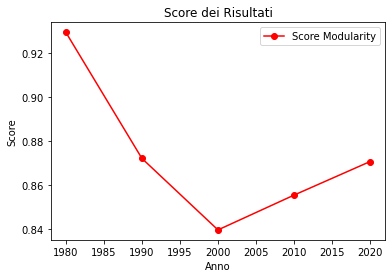

In [48]:
scores_2_condu = [result.score for result in condu_2_tot]
scores_2_mod = [result.score for result in mod_2_tot]
x = annata


plt.plot(x, scores_2_mod, marker='o', linestyle='-', color='r', label='Score Modularity')

plt.xlabel('Anno')
plt.ylabel('Score')

plt.legend()
plt.title('Score dei Risultati')
plt.show()


In [46]:
#test con label propagation
tc_3 = TemporalClustering()
t=1
for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    coms = algorithms.label_propagation(g)
    tc_3.adk = 3
cliques = list(nx.find_cliques(G))

# Filtra le comunità che soddisfano il criterio k-clique
k_clique_communities = [c for c in cliques if len(c) >= k]

# Stampa le comunità trovate
for i, community in enumerate(k_clique_communities):
    print(f"Community {i + 1}: {community}")d_clustering(coms, t)
    print(len(tc_3.get_clustering_at(t).communities))   
    t = t+1

141
582
1087
1762
2691


In [50]:
condu_3_tot=[]
mod_3_tot=[]


for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    coms = algorithms.label_propagation(g)
    condu=coms.conductance()
    mod=coms.newman_girvan_modularity()
    condu_3_tot.append(condu)
    mod_3_tot.append(mod)

In [51]:
condu_3_tot

[FitnessResult(min=0.0, max=0.6888888888888889, score=0.21501611750565666, std=0.20586172275612266),
 FitnessResult(min=0.0, max=0.8577777777777778, score=0.33027218094043725, std=0.20345534644253344),
 FitnessResult(min=0.0, max=0.8181818181818182, score=0.3719103841327974, std=0.20739270242421687),
 FitnessResult(min=0.0, max=0.8666666666666667, score=0.4021192543914807, std=0.18697796009096526),
 FitnessResult(min=0.0, max=0.8333333333333334, score=0.4259001706968304, std=0.17072302809301926)]

In [ ]:
evaluation.average_internal_degree(g, leiden_coms)

In [55]:
trend_3 = tc_3.clustering_stability_trend(evaluation.nf1)
trend_3

[0.03534726874275022,
 0.10326438728996126,
 0.20480654573211154,
 0.26919838606329194]

In [ ]:
evaluation.normalized_mutual_information(leiden_coms, lp_coms)

In [60]:
#external evaluation tra louvain e leiden cluster
tc_4 = TemporalClustering()
tc_5 = TemporalClustering()

for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    louvain_coms = algorithms.louvain(g)
    leiden_coms = algorithms.leiden(g)
    tc_4.add_clustering(louvain_coms, t)
    tc_5.add_clustering(leiden_coms, t)
    
    NMI=evaluation.normalized_mutual_information(louvain_coms, leiden_coms)
    print(NMI)
    
    t = t+1

MatchingResult(score=0.9823533384942181, std=None)
MatchingResult(score=0.8796962443262145, std=None)
MatchingResult(score=0.8427435971273084, std=None)
MatchingResult(score=0.8669477294444808, std=None)
MatchingResult(score=0.8741941078796233, std=None)


In [68]:
#test con k-clique
tc_6= TemporalClustering()
t=1

for G in X_TOT:
    g = nx.from_pandas_edgelist(G, target = "Target" ,source = "Source" )
    k_clique_coms = algorithms.kclique(g,k=3)
    tc_6.add_clustering(k_clique_coms, t)
    print(len(tc_6.get_clustering_at(t).communities))   
    t=t+1

216
651
1163
1626
2018


In [69]:
trend_6 = tc_6.clustering_stability_trend(evaluation.nf1)
trend_6

[0.0449357476573974,
 0.13275643819616398,
 0.2732427167642628,
 0.3464846999439978]